In [2]:
import pandas as pd
df=pd.read_csv('fruits.csv')
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [5]:
x=df[['Weight','Size']]
y=df['Class']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)


In [6]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [10]:
print("Training Accuracy: ", dt.score(xtrain,ytrain))

Training Accuracy:  1.0


In [12]:
print("Testing Accuracy: ", dt.score(xtest,ytest))

Testing Accuracy:  1.0


- If training accuracy is more than testing accuracy=over fitting model
- here both have same accuracy , therefore it is not overfitting model
- Hence it has learnt well


[Text(0.5, 0.75, 'Size <= 4.97\ngini = 0.498\nsamples = 30\nvalue = [16, 14]\nclass = Orange'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = Apple'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = Orange')]

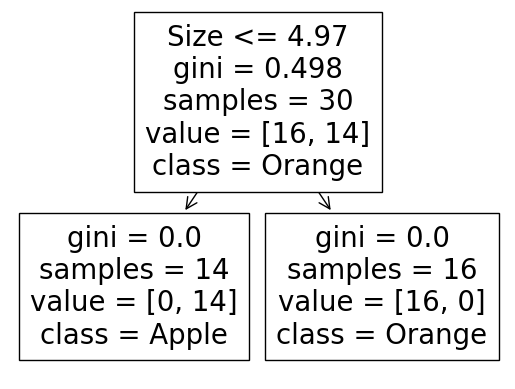

In [17]:
from sklearn.tree import plot_tree
plot_tree(dt, feature_names=['Weight','Size'],class_names=['Orange','Apple'])

In [18]:
from sklearn.tree import export_text
print(export_text(dt,feature_names=['Weight','Size']))

|--- Size <= 4.97
|   |--- class: orange
|--- Size >  4.97
|   |--- class: apple



In [25]:
from sklearn.tree import DecisionTreeClassifier
dte=DecisionTreeClassifier(criterion='entropy')
dte.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [26]:
print("Training Accuracy: " , dte.score(xtrain,ytrain))

Training Accuracy:  1.0


In [27]:
print("Testing Accuracy: " , dt.score(xtest,ytest))

Testing Accuracy:  1.0


[Text(0.5, 0.75, 'Size <= 4.97\nentropy = 0.997\nsamples = 30\nvalue = [16, 14]\nclass = Orange'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = Apple'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = Orange')]

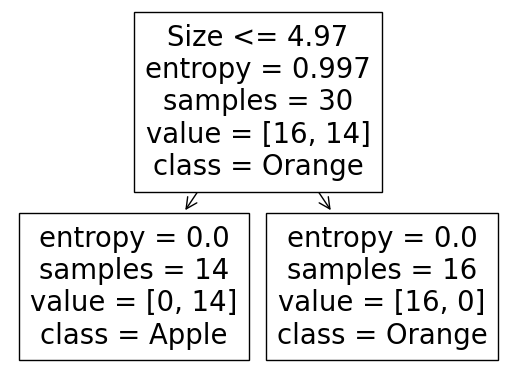

In [28]:
from sklearn.tree import plot_tree
plot_tree(dte, feature_names=['Weight','Size'],class_names=['Orange','Apple'])

In [36]:
from sklearn.model_selection import GridSearchCV
model=GridSearchCV(dt,param_grid={'criterion':['gini','entropy']},scoring='accuracy',cv=5)

In [37]:
model.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='accuracy')

In [38]:
model.best_estimator_

DecisionTreeClassifier()

In [39]:
model.score(xtest,ytest)

0.8

[Text(0.5, 0.75, 'Weight <= 69.5\ngini = 0.498\nsamples = 30\nvalue = [16, 14]\nclass = Orange'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = Apple'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = Orange')]

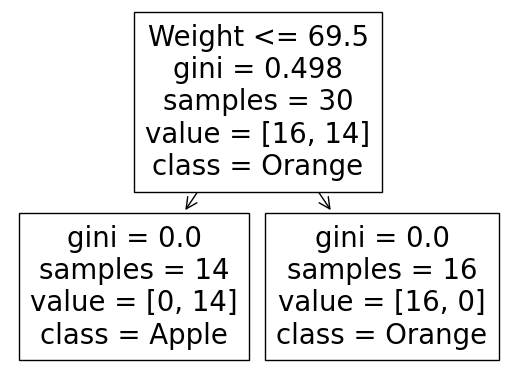

In [40]:
from sklearn.tree import plot_tree
plot_tree(model.best_estimator_, feature_names=['Weight','Size'],class_names=['Orange','Apple'])

In [41]:
from sklearn.tree import export_text
print(export_text(model.best_estimator_,feature_names=['Weight','Size']))

|--- Weight <= 69.50
|   |--- class: orange
|--- Weight >  69.50
|   |--- class: apple



# BMI dataset

In [42]:
db=pd.read_csv('BMI.csv')
db.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
db['Gender']=le.fit_transform(db['Gender'])
db.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [46]:
x=db[['Gender','Height','Weight']]
y=db['Index']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1,shuffle=True)

In [47]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [48]:
gv={'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6],'max_features':[1,2,3]}
mod=GridSearchCV(dt,param_grid=gv,scoring='accuracy',cv=10,verbose=True)
mod.fit(xtrain,ytrain)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


C:\Users\Navyashri\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [1, 2, 3]},
             scoring='accuracy', verbose=True)

In [53]:
mod.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=3)

In [56]:
from sklearn.tree import export_text
print(export_text(mod.best_estimator_,feature_names=['Gender','Height','Weight']))

|--- Weight <= 83.50
|   |--- Height <= 167.50
|   |   |--- Weight <= 63.50
|   |   |   |--- Height <= 152.00
|   |   |   |   |--- Weight <= 57.50
|   |   |   |   |   |--- Gender <= 0.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Gender >  0.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- Weight >  57.50
|   |   |   |   |   |--- class: 3
|   |   |   |--- Height >  152.00
|   |   |   |   |--- Height <= 162.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Height >  162.50
|   |   |   |   |   |--- Height <= 163.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Height >  163.50
|   |   |   |   |   |   |--- class: 2
|   |   |--- Weight >  63.50
|   |   |   |--- Height <= 148.50
|   |   |   |   |--- Height <= 141.50
|   |   |   |   |   |--- Weight <= 77.50
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- Weight >  77.50
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |--- Height >  141.50
|   |   |   |   |   |--- 

[Text(0.5089285714285714, 0.9285714285714286, 'X[2] <= 83.5\nentropy = 2.17\nsamples = 375\nvalue = [9, 19, 52, 51, 98, 146]'),
 Text(0.2910714285714286, 0.7857142857142857, 'X[1] <= 167.5\nentropy = 2.194\nsamples = 113\nvalue = [9, 19, 47, 20, 16, 2]'),
 Text(0.14642857142857144, 0.6428571428571429, 'X[2] <= 63.5\nentropy = 1.853\nsamples = 54\nvalue = [1, 0, 19, 16, 16, 2]'),
 Text(0.07142857142857142, 0.5, 'X[1] <= 152.0\nentropy = 0.998\nsamples = 23\nvalue = [1, 0, 17, 5, 0, 0]'),
 Text(0.04285714285714286, 0.35714285714285715, 'X[2] <= 57.5\nentropy = 0.863\nsamples = 7\nvalue = [0, 0, 2, 5, 0, 0]'),
 Text(0.02857142857142857, 0.21428571428571427, 'X[0] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [0, 0, 2, 1, 0, 0]'),
 Text(0.014285714285714285, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(0.04285714285714286, 0.07142857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.05714285714285714, 0.21428571428571427, 

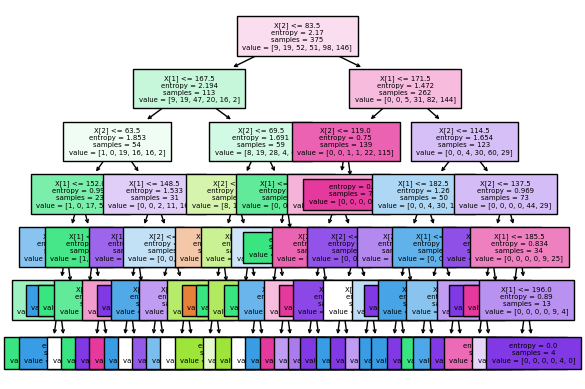

In [61]:
from sklearn.tree import plot_tree
plot_tree(mod.best_estimator_,fontsize=5,filled=True)